In [1]:
%load_ext autoreload
%autoreload 2
from targets.density_estimation_target import *

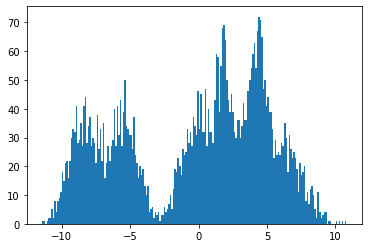

In [2]:
target = Dimension1()
data = target.sample(5000)
fig = plt.hist(data.numpy(), bins = 200)
plt.show()

In [47]:
def grads_to_vector(parameters):
    r"""Convert parameters to one vector

    Args:
        parameters (Iterable[Tensor]): an iterator of Tensors that are the
            parameters of a model.

    Returns:
        The parameters represented by a single vector
    """
    vec = []
    for param in parameters:
        vec.append(param.grad.view(-1))
    return torch.cat(vec)

def parameters_to_vector(parameters):
    r"""Convert parameters to one vector

    Args:
        parameters (Iterable[Tensor]): an iterator of Tensors that are the
            parameters of a model.

    Returns:
        The parameters represented by a single vector
    """
    vec = []
    for param in parameters:
        vec.append(param.view(-1))
    return torch.cat(vec)

In [51]:
from models_dif import DIFDensityEstimator, SoftmaxWeight
initial_model = DIFDensityEstimator(data, 10)

sigma_phi = 5
lbda = (1/(2*sigma_phi**2))
print(lbda)

def modified_loss(model, eta):
    parameter_vector = parameters_to_vector(model.parameters())
    return -model.loss(model.target_samples)*model.target_samples.shape[0] + torch.sum(parameter_vector*torch.randn_like(parameter_vector)*((2/eta)**(1/2)))

0.02


In [52]:
modified_log_prob = modified_loss(initial_model, 1)
modified_log_prob.backward()
grad_vector = grads_to_vector(initial_model.parameters())
current_model = initial_model

torch.Size([10, 1])
torch.Size([10])
torch.Size([10, 1])
torch.Size([10, 1])


In [54]:
from IPython.display import clear_output
import copy
from tqdm import tqdm
linspace = torch.linspace(-15.,15., 200)

#initialize model and gradients

tau = 1e-3
optimizer = torch.optim.SGD(initial_model.parameters(), lr = tau, weight_decay= lbda)
for i in tqdm(range(20000)):
    if i%1==0:
        clear_output(wait = True)
        plt.figure()
        sum_density = torch.exp(initial_model.log_density(linspace.unsqueeze(-1)))
        plt.plot(linspace, sum_density.detach().numpy())
        plt.show()

    #copy model
    optimizer.zero_grad()
    loss = modified_loss(initial_model, tau)
    loss.backward()
    optimizer.step()

  0%|▍                                                                                                                                                 | 64/20000 [00:08<42:31,  7.81it/s]


KeyboardInterrupt: 